네이버 영화 리뷰 데이터
- 20만개 데이터로 구성

In [1]:
import pandas as pd

In [7]:
train_data = pd.read_table('./data/ratings_train.txt')
test_data = pd.read_table('./data/ratings_test.txt')

In [10]:
print(len(train_data))
print(len(test_data))

150000
50000


In [8]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [9]:
test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [12]:
train_data['label'].value_counts()
# 0 부정 : 75173
# 1 긍정 : 74827

0    75173
1    74827
Name: label, dtype: int64

In [14]:
# 결측치 확인
print(train_data.isnull().sum())

id          0
document    5
label       0
dtype: int64


In [17]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [20]:
# null 값 drop
train_data = train_data.dropna(how='any')      #how='any' : 열에 하나라도 null이 있으면
print(train_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [22]:
test_data = test_data.dropna(how='any') 
print(test_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [23]:
# 정규식을 이용해서 한글과 공백을 제외한 문자를 제거!
train_data.document = train_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
test_data.document = test_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')

C:\Users\SMT002\anaconda3\envs\deep01\lib\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [29]:
train_data.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [30]:
from konlpy.tag import Okt

# 불용어 제거
stop_word = ['의','가','이','은','는','를','들','좀','걍','잘','과','와','도','을','으로','자','에','한']

okt = Okt()

X_train = []

for i in train_data.document :
    tempX = []
    # 형태소 분리 ( Stem : 어간추출 (만들다, 만들었어요, 만들고 --> 만들다로))
    tempX = okt.morphs(i, stem=True)
    # 불용어 제거
    tempX = [word for word in tempX if not word in stop_word]
    X_train.append(tempX)

In [31]:
print(X_train[4])

['사이', '몬페', '그', '익살스럽다', '연기', '돋보이다', '영화', '스파이더맨', '에서', '늙다', '보이다', '하다', '커스틴', '던스트', '너무나도', '이쁘다', '보이다']


In [36]:
X_test = []

for i in test_data.document :
    tempX = []
    # 형태소 분리 ( Stem : 어간추출 (만들다, 만들었어요, 만들고 --> 만들다로))
    tempX = okt.morphs(i, stem=True)
    # 불용어 제거
    tempX = [word for word in tempX if not word in stop_word]
    X_test.append(tempX)

Exception ignored in: <bound method tqdm.__del__ of   0%|<bar/>| 0/49997 [00:23<?, ?it/s]>
Traceback (most recent call last):
  File "C:\Users\SMT002\anaconda3\envs\deep01\lib\site-packages\tqdm\std.py", line 1128, in __del__
    self.close()
  File "C:\Users\SMT002\anaconda3\envs\deep01\lib\site-packages\tqdm\notebook.py", line 261, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


### 인코딩

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 35000 #학습에 사용될 단어의 수
# 빈도수 35000위 내 단어들만 사용
tokenizer = Tokenizer(num_words = max_features)
#인코딩하기 위해 분석
tokenizer.fit_on_texts(X_train)

AttributeError: 'int' object has no attribute 'lower'

In [55]:
# 분석 결과를 훈련데이터와 테스트데이터에 적용하여 인코딩
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

AttributeError: 'int' object has no attribute 'lower'

In [56]:
X_train[:3]

[[50, 457, 16, 260, 660],
 [919, 459, 41, 599, 1, 214, 1455, 24, 965, 676, 19],
 [386, 2452, 25024, 2319, 5676, 2, 221, 9]]

In [58]:
# 리뷰의 최대길이, 최소길이
print('훈련 최대 길이 :',max(len(i) for i in X_train))
print('훈련 최소 길이 :',min(len(i) for i in X_train))
print('테스트 최대 길이 :',max(len(i) for i in X_test))
print('테스트 최소 길이 :',min(len(i) for i in X_test))

훈련 최대 길이 : 69
훈련 최소 길이 : 0
테스트 최대 길이 : 61
테스트 최소 길이 : 0


### 인코딩 된 데이터를 같은 길이로 자름

In [60]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_word = 30

# 단어를 30개까지만 잘라줌
X_train = pad_sequences(X_train, maxlen=max_word)
X_test = pad_sequences(X_test, maxlen=max_word)

In [62]:
y_train = train_data.label
y_test = test_data.label

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149995, 30), (49997, 30), (149995,), (49997,))

### Word Embedding : 인코딩 된 단어를 벡터공간에 사상시키(배치하)는 방법 : 단어간 거리 기반

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, SimpleRNN

model1 = Sequential()

# 사전의 최대 단어 수, 차원 수(단어간 연결 수), 데이터의 길이
model1.add(Embedding(max_features, 100, input_length = max_word))

model1.add(SimpleRNN(128))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           3500000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               29312     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 3,529,441
Trainable params: 3,529,441
Non-trainable params: 0
_________________________________________________________________


In [65]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
hist = model1.fit(X_train,y_train, epochs = 5, batch_size= 50,
                 validation_split=0.3)

Train on 104996 samples, validate on 44999 samples
Epoch 1/5
104996/104996 [==============================] - 83s 788us/sample - loss: 0.4159 - accuracy: 0.8065 - val_loss: 0.3888 - val_accuracy: 0.8282
Epoch 2/5
104996/104996 [==============================] - 80s 760us/sample - loss: 0.3150 - accuracy: 0.8673 - val_loss: 0.3851 - val_accuracy: 0.8328
Epoch 3/5
104996/104996 [==============================] - 80s 758us/sample - loss: 0.2359 - accuracy: 0.9050 - val_loss: 0.4389 - val_accuracy: 0.8231
Epoch 4/5
104996/104996 [==============================] - 80s 760us/sample - loss: 0.1772 - accuracy: 0.9312 - val_loss: 0.4938 - val_accuracy: 0.8124
Epoch 5/5
104996/104996 [==============================] - 80s 757us/sample - loss: 0.1430 - accuracy: 0.9445 - val_loss: 0.5598 - val_accuracy: 0.8099


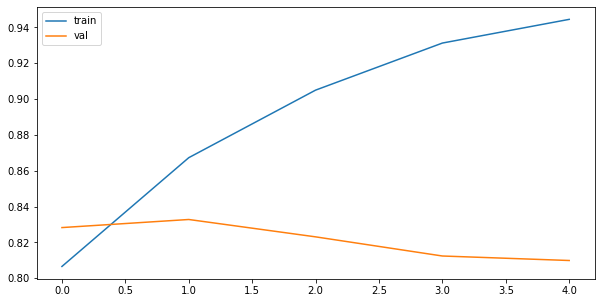

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) #가로,세로
plt.plot(hist.history['accuracy'], label = 'train') # 훈련용 데이터로 평가한 점수
plt.plot(hist.history['val_accuracy'], label= 'val') # 검증용 데이터로 평가한 점수
plt.legend()
plt.show()

In [68]:
#LSTM
from tensorflow.keras.layers import LSTM, GRU

model2 = Sequential()

# 사전의 최대 단어 수, 차원 수(단어간 연결 수), 데이터의 길이
model2.add(Embedding(max_features, 100, input_length = max_word))
                                                    # 이전 데이터를 몇개나 가져올지??
model2.add(LSTM(128)) # 메모리셀 수, input_shape = (데이터 크기, 시간)
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           3500000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,617,377
Trainable params: 3,617,377
Non-trainable params: 0
_________________________________________________________________


In [69]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
hist2 = model2.fit(X_train,y_train, epochs = 5, batch_size= 50,
                 validation_split=0.3)

Train on 104996 samples, validate on 44999 samples
Epoch 1/5
104996/104996 [==============================] - 82s 781us/sample - loss: 0.3897 - accuracy: 0.8215 - val_loss: 0.3574 - val_accuracy: 0.8440
Epoch 2/5
104996/104996 [==============================] - 75s 719us/sample - loss: 0.2892 - accuracy: 0.8766 - val_loss: 0.3451 - val_accuracy: 0.8485
Epoch 3/5
104996/104996 [==============================] - 76s 719us/sample - loss: 0.2293 - accuracy: 0.9045 - val_loss: 0.3758 - val_accuracy: 0.8447
Epoch 4/5
104996/104996 [==============================] - 76s 726us/sample - loss: 0.1827 - accuracy: 0.9260 - val_loss: 0.4159 - val_accuracy: 0.8442
Epoch 5/5
104996/104996 [==============================] - 76s 725us/sample - loss: 0.1446 - accuracy: 0.9418 - val_loss: 0.4656 - val_accuracy: 0.8349


In [75]:
import numpy as np

pred = model1.predict(X_test)

print(y_test[5])
print(pred[5])

1
[0.9887925]
